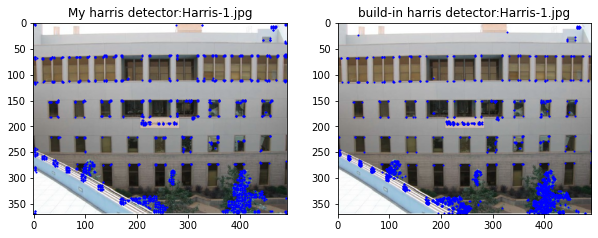

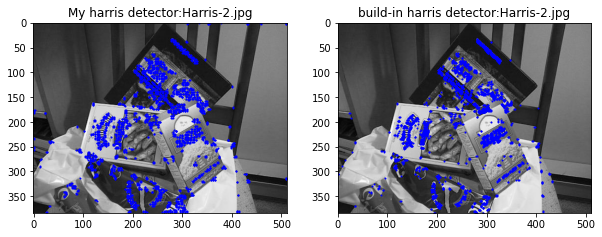

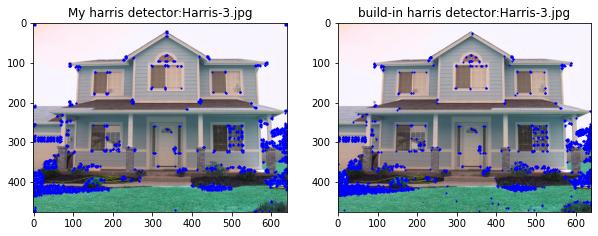

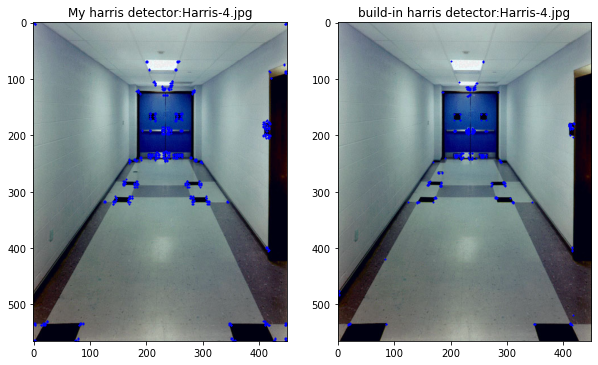

In [136]:
"""
CLAB Task-1: Harris Corner Detector
Your name (Your uniID):Xiran Yan u7167582
"""

"""
This script allow users to detect corner for 4 images named 'Harris-?.jpg', 
which are in the same file with this python script
And then display original images with blue dot corners
and outcomes from in-build 'harris detector' function 
in the output console  
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt


# Parameters, add more if needed
sigma = 2
thresh = 0.01  #increase it will lead to recognizing less corners
k=0.1   # increase it will reduce non-corner points around the corner(suppression effect)
nonMaxSize=3 #if suppression window is too large, the detecting corners will decrease

def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)] #flip the metrix
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result


def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


def gradCalculate(bw,g):   
    # Derivative masks
    dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    dy = dx.transpose()

    # computer x and y derivatives of image
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)

    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)
    
    return Ix2,Iy2,Ixy

   

######################################################################
# Task: Compute the Harris Cornerness
######################################################################

# calculate cornerness by equation R=detM-k*(traceM)^2
def cornernessCal(bw,Ix2,Iy2,Ixy):
    R=np.zeros((bw.shape))
    #calculate by pixels     
    for i in range(bw.shape[0]):
        for j in range(bw.shape[1]):
            # create M metrix             
            M = [[Ix2[i,j],Ixy[i,j]],[Ixy[i,j],Iy2[i,j]]]
            # calculate R by R=detM-k*(traceM)^2
            r = np.linalg.det(M)-k*(np.trace(M)**2)
            # add each corneress into set             
            R[i,j]=r
    return R

######################################################################
# Task: Perform non-maximum suppression and
#       thresholding, return the N corner points
#       as an Nx2 matrix of x and y coordinates
######################################################################

# process the threshing and non-max-suppression operation 
def ThreshNonMaxSuppression(R,nonMaxSize):
    # initialise results set    
    Res=np.array([[0,0]])
    w=nonMaxSize
    # threshing & put max R's(in this window) location into the results set
    for i in range(0,R.shape[0],w):
        for j in range(0,R.shape[1],w):
            #  create a W*W window to do non-max-suppression
            window=np.array(R[i:i+w,j:j+w])
            # select corneress that bigger than threshold           
            if window.max()>(thresh*R.max()):
                # get the max R value in this window
                r=np.max(window)
                # get its location in this window
                resY,resX=np.array(np.where(r==window))
                #  calculate the original location             
                loc=np.array([[resY[0]+i,resX[0]+j]])
                #  add into result set              
                Res=np.append(Res,loc,0)
          
    return Res
  
    
def harrisCorner():
    
    # comment: Create 6sigma+1 X 6sigma+1 Gaussian Window
    g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)
    
    for i in range(1,5):
        
        # grey image
        imgG = cv2.imread('Harris-'+str(i)+'.jpg',0)
        # RGB image
        img= cv2.imread('Harris-'+str(i)+'.jpg',1)
        # calculate the gradients of gaussianed image        
        Ix2,Iy2,Ixy=gradCalculate(imgG,g)
        # calculate the R cornerness value
        R=cornernessCal(imgG,Ix2,Iy2,Ixy)
        Res=ThreshNonMaxSuppression(R,nonMaxSize)
        
        #  plot the image and compare with in-build function
        plt.subplots(1,2,figsize = (10,10))
        
        # my function  
        plt.subplot(1,2,1)         
        plt.scatter(Res[1:,1],Res[1:,0],s=1,c='b')
        plt.title('My harris detector:Harris-'+str(i)+'.jpg')
        plt.imshow(img)
    
        #build-in function     
        plt.subplot(1,2,2)
        dst = cv2.cornerHarris(imgG,2,3,k)
        resY,resX=np.array(np.where(dst>thresh*dst.max()))
        plt.scatter(resX,resY,s=1,c='b')
        plt.title('build-in harris detector:Harris-'+str(i)+'.jpg')
        plt.imshow(img)
          
    plt.show()
       
harrisCorner()
